In [1]:
%%capture
!pip install pandas scikit-learn matplotlib seaborn lightgbm

In [2]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load your CSV
filename='Combined_AI_Features - Combined All Features.csv'
df = pd.read_csv(filename)  # Replace with your actual CSV file name

# Feature columns and label
X = df[["Spectral Centroid", "Spectral Bandwidth", "Spectral Rolloff"]]
y = df["Label"]

# Encode the label (AI = 0, Human = 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LOOCV setup
loo = LeaveOneOut()

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear Kernel)": SVC(kernel="linear"),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)
}

# Evaluate each model with LOOCV
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y_encoded, cv=loo)
    print(f"{name} LOOCV Accuracy: {np.mean(scores):.2f} ({np.sum(scores)}/{len(scores)})")


Logistic Regression LOOCV Accuracy: 0.80 (24.0/30)
SVM (Linear Kernel) LOOCV Accuracy: 0.80 (24.0/30)
Random Forest LOOCV Accuracy: 0.97 (29.0/30)


Audio Classification Pipeline
Loaded 30 samples
Features: ['Spectral Centroid', 'Spectral Bandwidth', 'Spectral Rolloff']
Classes: ['AI' 'Human']

Generating data visualizations...


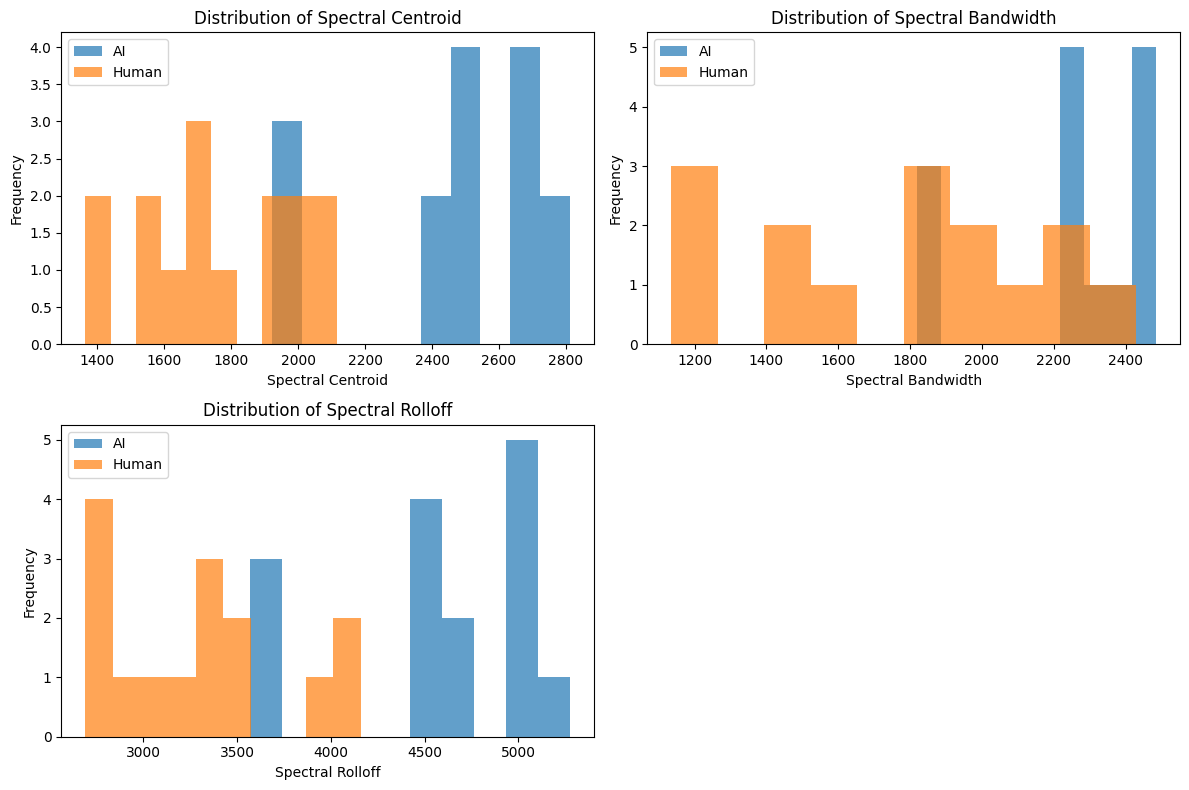


Training set size: 21
Test set size: 9

Training classifiers...
Random Forest:
  CV Accuracy: 0.833 (+/- 0.422)
SVM:
  CV Accuracy: 0.800 (+/- 0.389)
Logistic Regression:
  CV Accuracy: 0.800 (+/- 0.389)

Best classifier: Random Forest with CV accuracy: 0.833

Evaluating Random Forest...

Test Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

          AI       1.00      1.00      1.00         5
       Human       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



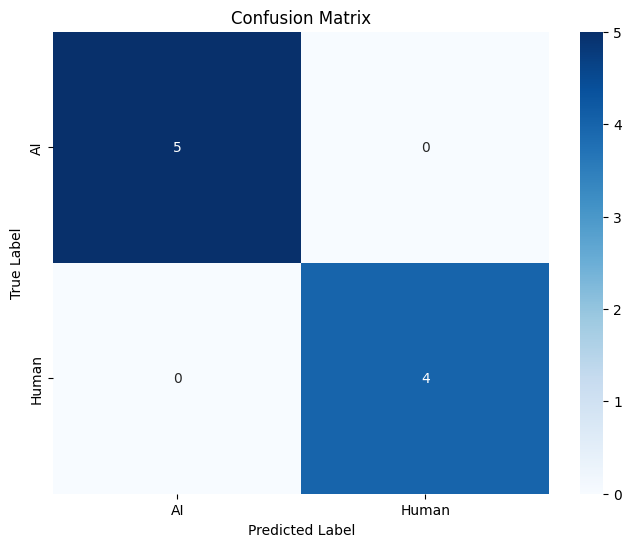

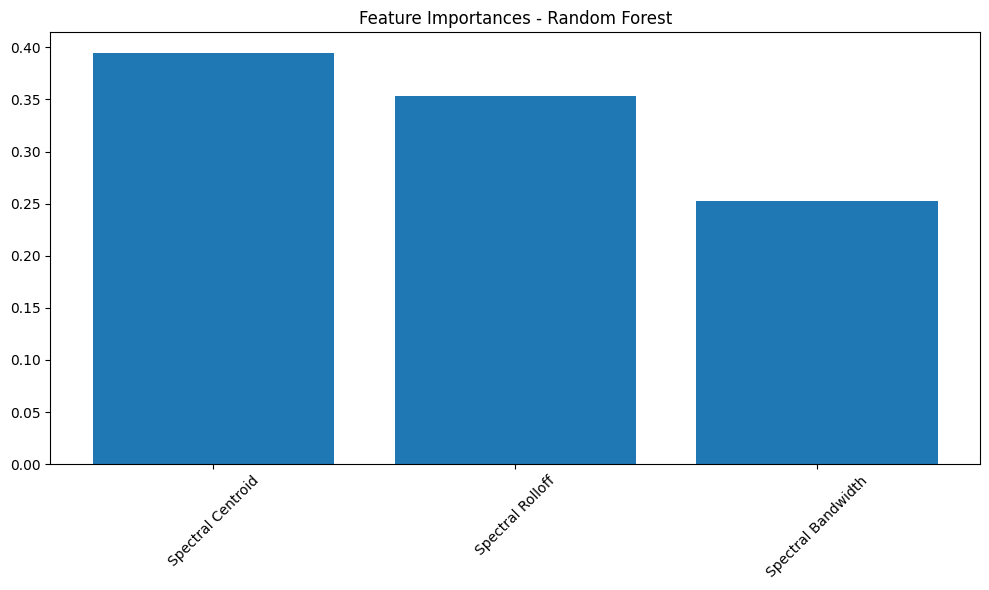


Example prediction on new sample:
0
[1. 0.]
1 is  ['Human']
0 is  ['AI']

Prediction for new sample:
Spectral Centroid: 2700
Spectral Bandwidth: 2400
Spectral Rolloff: 5000
Predicted Class: AI
Confidence: 1.000

Classification pipeline completed!
You can now use the trained model to classify new audio samples.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data based on your format
# You'll need to replace this with your actual 30 samples


def load_and_prepare_data():
    """Load and prepare the audio features data"""
    # If you have a CSV file, use this instead:
    df = pd.read_csv('Combined_AI_Features - Combined All Features.csv')
    
    # df = pd.DataFrame(data)
    
    # Encode labels
    le = LabelEncoder()
    df['Label_Encoded'] = le.fit_transform(df['Label'])
    
    return df, le

def train_classifiers(X, y):
    """Train multiple classifiers and return the best one"""
    classifiers = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
    }
    
    results = {}
    best_score = 0
    best_classifier = None
    best_name = ""
    
    for name, clf in classifiers.items():
        # Cross-validation
        cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        results[name] = {
            'mean_cv_score': cv_scores.mean(),
            'std_cv_score': cv_scores.std(),
            'classifier': clf
        }
        
        print(f"{name}:")
        print(f"  CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        
        if cv_scores.mean() > best_score:
            best_score = cv_scores.mean()
            best_classifier = clf
            best_name = name
    
    print(f"\nBest classifier: {best_name} with CV accuracy: {best_score:.3f}")
    return best_classifier, best_name, results

def evaluate_model(clf, X_train, X_test, y_train, y_test, le):
    """Evaluate the trained model"""
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy: {accuracy:.3f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return clf

def plot_feature_importance(clf, feature_names, classifier_name):
    """Plot feature importance for tree-based models"""
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importances - {classifier_name}')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()

def visualize_data(df):
    """Create visualizations of the data"""
    # Pairplot
    plt.figure(figsize=(12, 8))
    feature_cols = ['Spectral Centroid', 'Spectral Bandwidth', 'Spectral Rolloff']
    
    for i, feature in enumerate(feature_cols):
        plt.subplot(2, 2, i+1)
        for label in df['Label'].unique():
            data_subset = df[df['Label'] == label][feature]
            plt.hist(data_subset, alpha=0.7, label=label, bins=10)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {feature}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def predict_new_sample(clf, scaler, le, spectral_centroid, spectral_bandwidth, spectral_rolloff):
    """Predict the class of a new audio sample"""
    # Prepare the new sample
    new_sample = np.array([[spectral_centroid, spectral_bandwidth, spectral_rolloff]])
    new_sample_scaled = scaler.transform(new_sample)
    
    # Make prediction
    prediction = clf.predict(new_sample_scaled)[0]
    probability = clf.predict_proba(new_sample_scaled)[0]
    print(prediction)
    print(probability)
    # Convert back to original label
    predicted_label = le.inverse_transform([prediction])[0]
    print('1 is ',le.inverse_transform([1]))
    print('0 is ',le.inverse_transform([0]))
    print(f"\nPrediction for new sample:")
    print(f"Spectral Centroid: {spectral_centroid}")
    print(f"Spectral Bandwidth: {spectral_bandwidth}")
    print(f"Spectral Rolloff: {spectral_rolloff}")
    print(f"Predicted Class: {predicted_label}")
    print(f"Confidence: {max(probability):.3f}")
    
    return predicted_label, max(probability)

def main():
    """Main function to run the classification pipeline"""
    print("Audio Classification Pipeline")
    print("=" * 40)
    
    # Load and prepare data
    df, le = load_and_prepare_data()
    print(f"Loaded {len(df)} samples")
    print(f"Features: {df.columns[:-2].tolist()}")
    print(f"Classes: {le.classes_}")
    
    # Visualize data
    print("\nGenerating data visualizations...")
    visualize_data(df)
    
    # Prepare features and target
    feature_cols = ['Spectral Centroid', 'Spectral Bandwidth', 'Spectral Rolloff']
    X = df[feature_cols].values
    y = df['Label_Encoded'].values
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print(f"\nTraining set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    
    # Train classifiers
    print("\nTraining classifiers...")
    best_clf, best_name, results = train_classifiers(X_scaled, y)
    
    # Evaluate best model
    print(f"\nEvaluating {best_name}...")
    trained_clf = evaluate_model(best_clf, X_train, X_test, y_train, y_test, le)
    
    # Plot feature importance
    plot_feature_importance(trained_clf, feature_cols, best_name)
    
    # Example prediction on new sample
    print("\nExample prediction on new sample:")
    predict_new_sample(trained_clf, scaler, le, 2700, 2400, 5000)
    
    return trained_clf, scaler, le

if __name__ == "__main__":
    # Run the classification pipeline
    model, scaler, label_encoder = main()
    
    print("\nClassification pipeline completed!")
    print("You can now use the trained model to classify new audio samples.")

In [ ]:
model

RandomForestClassifier(random_state=42)

In [ ]:
from joblib import dump

dump(model, 'test_model.joblib')

['test_model.joblib']

In [7]:
scaler

StandardScaler()

In [8]:
dump(scaler,'scaler.joblib')

['scaler.joblib']

In [11]:
model.feature_importances_

array([0.39466365, 0.25246196, 0.35287439])

In [13]:
from joblib import load
model1 = load('test_model.joblib')

In [14]:
model1.feature_importances_

array([0.39466365, 0.25246196, 0.35287439])

In [15]:
X_scaled

array([[ 1.41892287,  1.05924276,  1.41151059],
       [ 1.34582082,  1.05715166,  1.34040624],
       [ 1.30607388,  1.0824014 ,  1.35419304],
       [ 1.33865653,  1.05161111,  1.34383095],
       [-0.45099799, -0.47930564, -0.44470707],
       [-0.40060306, -0.40869528, -0.39917308],
       [-0.29051321, -0.45595186, -0.33446324],
       [ 1.28366796,  0.95466815,  1.2298461 ],
       [ 1.57829408,  1.20259896,  1.62205679],
       [ 0.89925251,  0.75137619,  0.87123071],
       [ 0.8187516 ,  0.69438506,  0.78080073],
       [ 0.94096558,  0.68907509,  0.85329996],
       [ 0.83271091,  0.63793787,  0.78935858],
       [ 0.70453717,  0.61949306,  0.69319048],
       [ 0.73524016,  0.64451504,  0.70673636],
       [-0.92951373, -0.16190466, -0.84265737],
       [-1.24529757, -0.53099415, -1.20511813],
       [-0.95757579, -0.05901323, -0.74023193],
       [-0.28916278, -1.24151717, -0.53290018],
       [-1.24155545, -2.21177836, -1.51219435],
       [-1.19576632, -2.05108475, -1.493

In [16]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])